# Naive Bayes

In [1]:
# Load all relevant modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # for statistical data visualization

from sklearn.preprocessing import OneHotEncoder

import os
import sys
import imp

from scipy import stats

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
import datasets as D
imp.reload(D)

/var/folders/b9/jjp98g8j2mbcn65j0fgl0dzw0000gp/T/ipykernel_43462/4170113328.py:11: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


<module 'datasets' from '/Users/mghifary/Work/Code/AI/IF6080/datasets.py'>

In [2]:
# Constants
DATADIR = os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), 'data')

In [3]:
# Load dataset
datapath = os.path.join(DATADIR, "adult.csv")
df = pd.read_csv(datapath, header=None, sep=",\s")

/var/folders/b9/jjp98g8j2mbcn65j0fgl0dzw0000gp/T/ipykernel_43462/436490193.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(datapath, header=None, sep=",\s")


### Exploratory Data Analysis (EDA)

In [4]:
# Rename column names
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
len(df.columns)

15

In [7]:
# Find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)
df[categorical]

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [8]:
# Check if there's missing value
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [9]:
# Frequency counts of categorical variables
for var in categorical:
    print(df[var].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

In [10]:
# Replace ? with NaN or null
for cat in categorical:
    df[cat].replace('?', np.NaN, inplace=True)

In [11]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

In [12]:
# check for cardinality in categorical variables
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


In [13]:
# Declare feature vector and target variable
X = df.drop(['income'], axis=1)
y = df['income']

In [14]:
# display categorical variables
categorical = [col for col in X.columns if X[col].dtypes == 'O']
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [15]:
y = y == '>50K'

In [16]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((22792, 14), (22792,), (9769, 14), (9769,))

### Feature Engineering

In [17]:
# Impute missing categorical variables with most frequent value
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)    

In [18]:
# check missing values in categorical variables in X_train
X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [19]:
# check missing values in categorical variables in X_test
X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [20]:
X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [21]:
X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

#### Encode categorical variables

In [22]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany


In [23]:
for var in categorical:
    cat_train_list = X_train[var].unique()
    cat_test_list = X_test[var].unique()

    print(f"var : {var}")
    # print(cat_list)
    print(len(cat_train_list), len(cat_test_list))

var : workclass
8 8
var : education
16 16
var : marital_status
7 7
var : occupation
14 14
var : relationship
6 6
var : race
5 5
var : sex
2 2
var : native_country
41 40


In [24]:
def encode_onehot(df_train, df_test, categorical):
    df_train_enc = df_train.copy()
    df_test_enc = df_test.copy()

    enc = OneHotEncoder()

    for cat in categorical:
        cat_onehot_train = enc.fit_transform(df_train[[cat]]).toarray().astype(np.uint)
        cat_onehot_test = enc.transform(df_test[[cat]]).toarray().astype(np.uint)

        cidx = df_train_enc.columns.get_loc(cat)
        print(f"cidx : {cidx}")
        for j, c in enumerate(enc.get_feature_names_out()):
            df_train_enc.insert(cidx, c, cat_onehot_train[:, j])
            df_test_enc.insert(cidx, c, cat_onehot_test[:, j])
            cidx += 1

    
    df_train_enc = df_train_enc.drop(categorical, axis=1)
    df_test_enc = df_test_enc.drop(categorical, axis=1)

    return df_train_enc, df_test_enc

In [25]:
X_train_enc, X_test_enc = encode_onehot(X_train[categorical], X_test[categorical], categorical)

cidx : 0
cidx : 9
cidx : 26
cidx : 34
cidx : 49
cidx : 56
cidx : 62
cidx : 65


In [26]:
X_train_enc.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
32098,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25206,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23491,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12367,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7054,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
X_test_enc.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
22278,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8950,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7838,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16505,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
19140,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### Naive Bayes training

In [28]:
Xv_train = X_train_enc.values.astype(np.uint)
yv_train = y_train.values.astype(np.uint)

Xv_test = X_test_enc.values.astype(np.uint)
yv_test = y_test.values.astype(np.uint)

In [29]:
idx1,  = np.where(yv_train == True)
idx0, = np.where(yv_train == False)

In [30]:
def fit(Xv, yv):
    idx1,  = np.where(yv == True)
    idx0, = np.where(yv == False)
    pxy1 = np.sum(Xv[idx1], axis=0) / np.sum(yv == True)
    pxy0 = np.sum(Xv[idx0], axis=0) / np.sum(yv == False)
    py1 = np.sum(yv) / len(yv)
    py0 = 1 - py1
    return pxy1, pxy0, py1, py0

pxy1, pxy0, py1, py0 = fit(Xv_train, yv_train)

<BarContainer object of 99 artists>

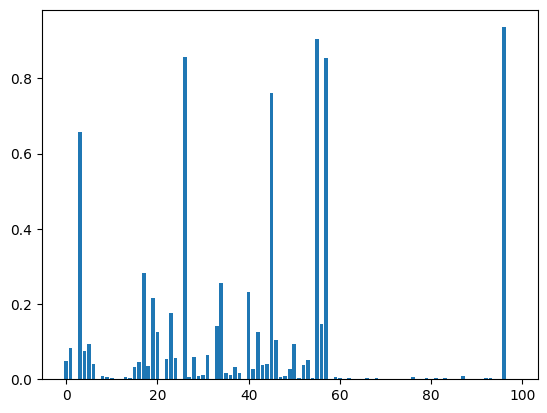

In [38]:
plt.bar(range(0, len(pxy1)), pxy1)

<BarContainer object of 99 artists>

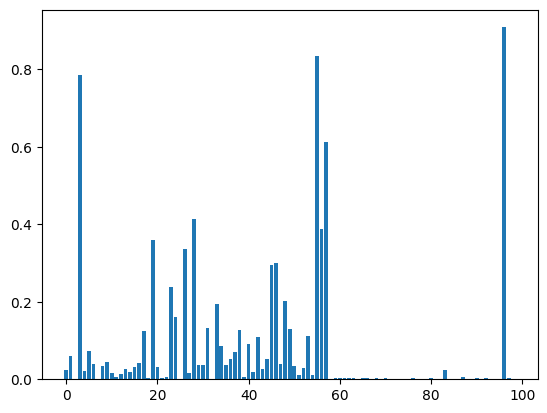

In [40]:
plt.bar(range(0, len(pxy0)), pxy0)

#### Inference / Prediction

In [41]:
def predict(x, pxy1, pxy0, py1, py0):
    eps = 1e-20

    term1 = (x @ np.log(pxy1 + eps)) + np.log(py1 + eps)
    term0 = (x @ np.log(pxy0 + eps)) + np.log(py0 + eps)
    exp1 = np.exp(term1)
    exp0 = np.exp(term0)

    proba = exp1 / (exp1 + exp0)

    yv_hat = (proba >= 0.5).astype(np.uint)
    return yv_hat, proba


yv_train_hat, proba_train = predict(Xv_train, pxy1, pxy0, py1, py0)
yv_test_hat, proba_test = predict(Xv_test, pxy1, pxy0, py1, py0)


In [42]:
def accuracy(y, y_hat):
    """
    Args:
        y:
        y_hat:
    """
    acc = np.sum(y == y_hat) / len(y)
    return acc

# Check accuracy
train_acc = accuracy(yv_train, yv_train_hat) * 100.
test_acc = accuracy(yv_test, yv_test_hat) * 100.

print(f"Accuracy: (training = {train_acc:.2f}, validation: {test_acc:.2f})")

Accuracy: (training = 79.12, validation: 78.90)


In [35]:
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(yv_train, yv_train_hat)

print(f"Confusion matrix (training):")
print(cm_train)

cm_test = confusion_matrix(yv_test, yv_test_hat)
print(f"Confusion matrix (test):")
print(cm_test)

Confusion matrix (training):
[[13938  3375]
 [ 1384  4095]]
Confusion matrix (test):
[[5966 1441]
 [ 620 1742]]


<Axes: >

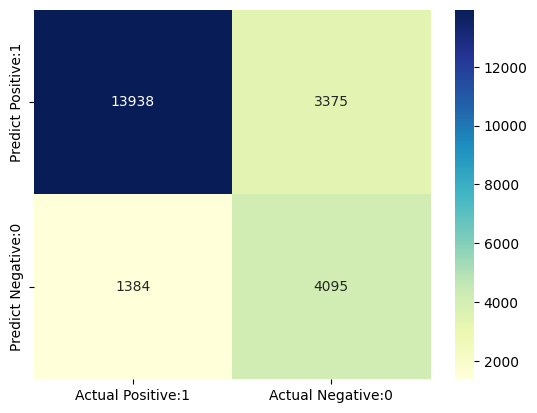

In [36]:
cm_train_mat = pd.DataFrame(
    data=cm_train, 
    columns=['Actual Positive:1', 'Actual Negative:0'],
    index=['Predict Positive:1', 'Predict Negative:0']
)

sns.heatmap(cm_train_mat, annot=True, fmt='d', cmap='YlGnBu')

<Axes: >

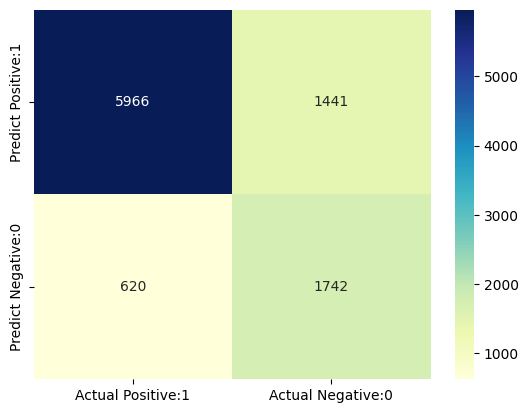

In [37]:
cm_test_mat = pd.DataFrame(
    data=cm_test, 
    columns=['Actual Positive:1', 'Actual Negative:0'],
    index=['Predict Positive:1', 'Predict Negative:0']
)

sns.heatmap(cm_test_mat, annot=True, fmt='d', cmap='YlGnBu')